Dataset Link --> https://huggingface.co/datasets/corbt/enron-emails

In [124]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import seaborn as sns

ds = load_dataset("corbt/enron-emails")
df = ds['train'].to_pandas()


In [125]:
df.head()

,message_id,subject,from,to,cc,bcc,date,body,file_name
0,<18782981.1075855378110.JavaMail.evans@thyme>,,phillip.allen@enron.com,[tim.belden@enron.com],[],[],2001-05-14 23:39:00+00:00,Here is our forecast\n\n,allen-p/_sent_mail/1.
1,<15464986.1075855378456.JavaMail.evans@thyme>,Re:,phillip.allen@enron.com,[john.lavorato@enron.com],[],[],2001-05-04 20:51:00+00:00,Traveling to have a business meeting takes the...,allen-p/_sent_mail/10.
2,<24216240.1075855687451.JavaMail.evans@thyme>,Re: test,phillip.allen@enron.com,[leah.arsdall@enron.com],[],[],2000-10-18 10:00:00+00:00,test successful. way to go!!!,allen-p/_sent_mail/100.
3,<13505866.1075863688222.JavaMail.evans@thyme>,,phillip.allen@enron.com,[randall.gay@enron.com],[],[],2000-10-23 13:13:00+00:00,"Randy,\n\n Can you send me a schedule of the s...",allen-p/_sent_mail/1000.
4,<30922949.1075863688243.JavaMail.evans@thyme>,Re: Hello,phillip.allen@enron.com,[greg.piper@enron.com],[],[],2000-08-31 12:07:00+00:00,Let's shoot for Tuesday at 11:45.,allen-p/_sent_mail/1001.


In [126]:
print(df.shape)
print(df.columns)
df.head()

(517401, 9)
Index(['message_id', 'subject', 'from', 'to', 'cc', 'bcc', 'date', 'body',
       'file_name'],
      dtype='object')


,message_id,subject,from,to,cc,bcc,date,body,file_name
0,<18782981.1075855378110.JavaMail.evans@thyme>,,phillip.allen@enron.com,[tim.belden@enron.com],[],[],2001-05-14 23:39:00+00:00,Here is our forecast\n\n,allen-p/_sent_mail/1.
1,<15464986.1075855378456.JavaMail.evans@thyme>,Re:,phillip.allen@enron.com,[john.lavorato@enron.com],[],[],2001-05-04 20:51:00+00:00,Traveling to have a business meeting takes the...,allen-p/_sent_mail/10.
2,<24216240.1075855687451.JavaMail.evans@thyme>,Re: test,phillip.allen@enron.com,[leah.arsdall@enron.com],[],[],2000-10-18 10:00:00+00:00,test successful. way to go!!!,allen-p/_sent_mail/100.
3,<13505866.1075863688222.JavaMail.evans@thyme>,,phillip.allen@enron.com,[randall.gay@enron.com],[],[],2000-10-23 13:13:00+00:00,"Randy,\n\n Can you send me a schedule of the s...",allen-p/_sent_mail/1000.
4,<30922949.1075863688243.JavaMail.evans@thyme>,Re: Hello,phillip.allen@enron.com,[greg.piper@enron.com],[],[],2000-08-31 12:07:00+00:00,Let's shoot for Tuesday at 11:45.,allen-p/_sent_mail/1001.


In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517401 entries, 0 to 517400
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype              
---  ------      --------------   -----              
 0   message_id  517401 non-null  object             
 1   subject     517401 non-null  object             
 2   from        517401 non-null  object             
 3   to          517401 non-null  object             
 4   cc          517401 non-null  object             
 5   bcc         517401 non-null  object             
 6   date        517401 non-null  datetime64[us, UTC]
 7   body        517401 non-null  object             
 8   file_name   517401 non-null  object             
dtypes: datetime64[us, UTC](1), object(8)
memory usage: 35.5+ MB


In [128]:
df.isnull().sum()

message_id    0
subject       0
from          0
to            0
cc            0
bcc           0
date          0
body          0
file_name     0
dtype: int64

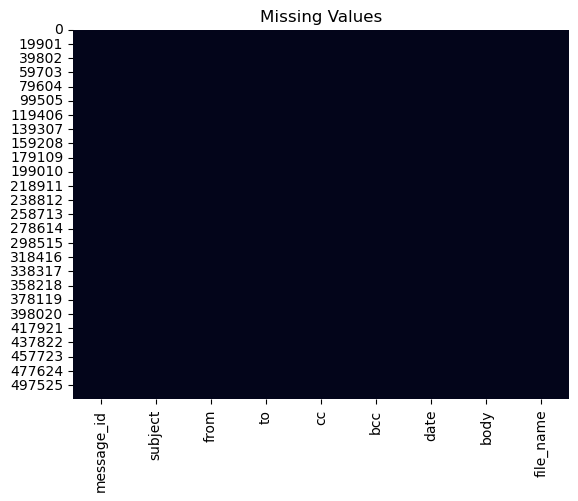

In [129]:
sns.heatmap(df.isnull(), cbar=False)
plt.title("Missing Values")
plt.show()

In [130]:
df = df[['subject', 'body']]
df.head()

,subject,body
0,,Here is our forecast\n\n
1,Re:,Traveling to have a business meeting takes the...
2,Re: test,test successful. way to go!!!
3,,"Randy,\n\n Can you send me a schedule of the s..."
4,Re: Hello,Let's shoot for Tuesday at 11:45.


In [131]:
df.shape

(517401, 2)

In [132]:
df['body'] = df['body'].str.strip()
df['subject'] = df['subject'].str.strip()
df.head()

,subject,body
0,,Here is our forecast
1,Re:,Traveling to have a business meeting takes the...
2,Re: test,test successful. way to go!!!
3,,"Randy,\n\n Can you send me a schedule of the s..."
4,Re: Hello,Let's shoot for Tuesday at 11:45.


In [133]:
df = df[df['body'] != '']
df.shape

(517401, 2)

In [134]:
df = df[df['subject'] != '']
df.shape

(498214, 2)

In [135]:
df.head(20)

,subject,body
1,Re:,Traveling to have a business meeting takes the...
2,Re: test,test successful. way to go!!!
4,Re: Hello,Let's shoot for Tuesday at 11:45.
5,Re: Hello,"Greg,\n\n How about either next Tuesday or Thu..."
7,Re: PRC review - phone calls,any morning between 10 and 11:30
8,Re: High Speed Internet Access,1. login: pallen pw: ke9davis\n\n I don't thi...
9,FW: fixed forward or other Collar floor gas pr...,---------------------- Forwarded by Phillip K ...
10,Re: FW: fixed forward or other Collar floor ga...,"Mr. Buckner,\n\n For delivered gas behind San ..."
12,Consolidated positions: Issues & To Do list,---------------------- Forwarded by Phillip K ...
13,Consolidated positions: Issues & To Do list,---------------------- Forwarded by Phillip K ...


In [136]:
import re
from bs4 import BeautifulSoup



In [137]:
df = df[df['subject'].str.len() > 5]
df = df[~df['subject'].str.lower().str.startswith('re:')]
df = df[df['body'].str.len() > 50]

df_sample = df.sample(20000, random_state=42)
df_sample.shape


(20000, 2)

In [138]:
def clean_the_text(text):
    regex_quoted_fw = r"(?i)(\n)*\-{2,}.+?(from|sent|subject):.+"
    regex_url = r"http\S+|www\S+|https\S+"
    regex_email = r'\S+@\S+'
    regex_special_char = r'[^A-Za-z0-9\s]+'
    if isinstance(text, str):
        text = BeautifulSoup(text, "html.parser").get_text() #removing htmls
        text = re.sub(regex_quoted_fw, "", text, flags=re.DOTALL) 
        text = re.sub(regex_url,'',text)
        text = re.sub(regex_email,'', text)
        text = re.sub(regex_special_char, '', text)
        text = text.strip().lower()
        return text
    else:
        return ""

In [ ]:
import swifter
df_sample['clean_body'] = df_sample['body'].swifter.apply(clean_the_text)
df_sample['clean_subject'] = df_sample['subject'].swifter.apply(clean_the_text)
df_sample

Pandas Apply:   5%|▍         | 938/20000 [00:15<05:37, 56.55it/s] /var/folders/20/g8yf7jjj72n76r9284flgkcw0000gn/T/ipykernel_71783/1834016456.py:7: MarkupResemblesLocatorWarning: The input passed in on this line looks more like a URL than HTML or XML.

If you meant to use Beautiful Soup to parse the web page found at a certain URL, then something has gone wrong. You should use an Python package like 'requests' to fetch the content behind the URL. Once you have the content as a string, you can feed that string into Beautiful Soup.

However, if you want to parse some data that happens to look like a URL, then nothing has gone wrong: you are using Beautiful Soup correctly, and this warning is spurious and can be filtered. To make this warning go away, run this code before calling the BeautifulSoup constructor:

    from bs4 import MarkupResemblesLocatorWarning
    import warnings

    warnings.filterwarnings("ignore", category=MarkupResemblesLocatorWarning)
    
  text = BeautifulSoup(tex

In [ ]:
df_sample['input_text'] = "generate subject: " + df_sample['clean_body']
df_sample['target_text'] = df_sample['clean_subject']

df_sample

,subject,body
1,Re:,Traveling to have a business meeting takes the...
2,Re: test,test successful. way to go!!!
4,Re: Hello,Let's shoot for Tuesday at 11:45.
5,Re: Hello,"Greg,\n\n How about either next Tuesday or Thu..."
7,Re: PRC review - phone calls,any morning between 10 and 11:30
...,...,...
517396,Trade with John Lavorato,This is a trade with OIL-SPEC-HEDGE-NG (John L...
517397,Gas Hedges,Some of my position is with the Alberta Term b...
517398,RE: CONFIDENTIAL,2\n\n -----Original Message-----\nFrom: \tDouc...
517399,Calgary Analyst/Associate,Analyst\t\t\t\t\tRank\n\nStephane Brodeur\t\t\...


In [ ]:
from sklearn.model_selection import train_test_split
train_df, temp_df = train_test_split(df_sample, test_size=0.3, random_state=42)
val_df, test_df = train_test_split(temp_df, test_size=0.5, random_state=42)


print(train_df.shape, val_df.shape, test_df.shape)